In [269]:
import warnings
warnings.filterwarnings('ignore')
#import libraries needed for analysis
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [270]:
#Detect current encoding type of companies.csv by reading chunk of data and find confidence for encoding type
with open("companies.csv", 'rb') as rawdata:
    encoding = chardet.detect(rawdata.read(50000))
    
encoding

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [271]:
#Detect current encoding type of rounds2.csv by reading chunk of data and find confidence for encoding type
with open("rounds2.csv", 'rb') as rawdata:
    encoding = chardet.detect(rawdata.read(50000))
        
encoding

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

# Checkpoint 1: Data Cleaning / Data Correction

In [272]:
#Read companies.csv files into dataframes using ISO-8859-1 as current utf-8 encoding is not supported.
companies_csv = pd.read_csv("companies.csv", encoding = "ISO-8859-1")

In [273]:
#Print top 10 rows of CSV
companies_csv.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [274]:
#Print Metadata of compony.csv file to know csv and its column structure 
companies_csv.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [275]:
#Read rounds2.csv files into dataframes using ISO-8859-1 as current utf-8 encoding is not supported.
rounds_csv = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")

In [276]:
#Print top 10 rows of CSV
rounds_csv.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [277]:
#Print Metadata of compony.csv file to know csv and its column structure 
rounds_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [278]:
#Create a uniue data from compony.csv file
companies_csv.permalink.unique()

array(['/Organization/-Fame', '/Organization/-Qounter',
       '/Organization/-The-One-Of-Them-Inc-', ...,
       '/Organization/Ã\x81Eron', '/Organization/Ã\x94Asys-2',
       '/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-Hizmetleri-Tic'],
      dtype=object)

In [279]:
# we can see the junk charatecters above in the unique data, so get rid of those and lower case the data
companies_csv.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies_csv.permalink = companies.permalink.str.lower()

In [280]:
#check again the unique values
companies_csv.permalink.unique()

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ...,
       '/organization/ã\x81eron', '/organization/ã\x94asys-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

In [281]:
# How many unique companies are present in companies?
companies['permalink'] = companies['permalink'].str.lower()
print(len(companies['permalink'].unique()))

#Reconfirming by descibe function
companies['permalink'].str.lower().describe()

66368


count                                   66368
unique                                  66368
top       /organization/ecosmart-technologies
freq                                        1
Name: permalink, dtype: object

In [282]:
#look at the unique data
rounds_csv.company_permalink.unique()

array(['/organization/-fame', '/ORGANIZATION/-QOUNTER',
       '/organization/-qounter', ..., '/organization/ã\x81eron',
       '/ORGANIZATION/Ã\x94ASYS-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

In [283]:
#cleaning the data
rounds_csv.company_permalink = rounds_csv.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds_csv.company_permalink = rounds_csv.company_permalink.str.lower()

In [284]:
#look at the unique data again
rounds_csv.company_permalink.unique()

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ..., '/organization/eron',
       '/organization/asys-2',
       '/organization/novatiff-reklam-ve-tantm-hizmetleri-tic'],
      dtype=object)

In [285]:
# How many unique companies are present in round2.csv?
rounds_csv.company_permalink = rounds_csv.company_permalink.str.lower()
print(len(rounds_csv.company_permalink.unique()))

#Reconfirming by descibe function
rounds_csv.company_permalink.str.lower().describe()

66368


count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [286]:
#Are there any companies in the rounds2 file which are not present in companies?
round_csv_data= set(rounds_csv.company_permalink.unique())
componies_csv_data = set(companies_csv.permalink.unique())

In [287]:
#check the difference between round 2 and companies
round_csv_data-componies_csv_data

{'/organization/10north',
 '/organization/51wofang-',
 '/organization/adslinked',
 '/organization/aesthetic-everything-social-network',
 '/organization/affluent-attach-club-2',
 '/organization/allgu-outlet',
 '/organization/asiansbook',
 '/organization/asys-2',
 '/organization/atlye-gri',
 '/organization/axgaz',
 '/organization/bhner-eh-gmbh',
 '/organization/boral-bikes-incorporated',
 '/organization/brasil-oznio',
 '/organization/bricopriv-com',
 '/organization/brv',
 '/organization/canal-da-pea',
 '/organization/cappt',
 '/organization/contrato-rpido',
 '/organization/cop-active-ltd',
 '/organization/crme-ciseaux',
 '/organization/desafo-tctico',
 '/organization/e-cbica',
 '/organization/energystone-games-',
 '/organization/eron',
 '/organization/etool-io',
 '/organization/freem',
 '/organization/frquentiel',
 '/organization/gesto-sade-e-tecnologia-3',
 '/organization/grfica-en-lnea',
 '/organization/huizuche-com-',
 '/organization/ignia-bienes-races',
 '/organization/ikignde-com',


Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.

In [288]:
main_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')

In [289]:
# Check for the length of the merged data
main_frame.shape

(114949, 16)

# Checkpoint 2: Funding Type Analysis

In [290]:
#Column wise null values check on dataframe
main_frame.isnull().sum(axis=0)

company_permalink          48581
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                  48581
name                       48582
homepage_url               53639
category_list              51729
status                     48581
country_code               55539
state_code                 57128
region                     56611
city                       56609
founded_at                 63802
dtype: int64

#### Some columns like permalink found repeated,some of columns not need to analysis hence dropping this columns

In [291]:
main_frame = main_frame.drop(['funding_round_code','funded_at','permalink','homepage_url','state_code','region','city','founded_at'],axis=1)

In [292]:
#check again for the null values
main_frame.isnull().sum(axis=0)

company_permalink          48581
funding_round_permalink        0
funding_round_type             0
raised_amount_usd          19990
name                       48582
category_list              51729
status                     48581
country_code               55539
dtype: int64

In [293]:
# check the values of companies status
main_frame.status.value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

In [294]:
#drop the companies that are closed i.e. non operational
main_frame =main_frame.loc[main_frame.status!='closed']

In [295]:
main_frame.shape

(108711, 8)

In [296]:
# drop companies which has no raised amount and country_Code is missing
main_frame = main_frame[~(main_frame['raised_amount_usd'].isnull() | main_frame['country_code'].isnull() | main_frame['category_list'].isnull())]

In [297]:
#check again for null values
main_frame.isnull().sum(axis=0)

company_permalink          0
funding_round_permalink    0
funding_round_type         0
raised_amount_usd          0
name                       0
category_list              0
status                     0
country_code               0
dtype: int64

In [298]:
#Funding round types check
main_frame.funding_round_type.value_counts()

venture                  23610
seed                     10855
debt_financing            3178
angel                     2215
grant                      936
private_equity             897
undisclosed                752
convertible_note           679
equity_crowdfunding        600
post_ipo_equity            298
product_crowdfunding       165
post_ipo_debt               67
non_equity_assistance       32
secondary_market            10
Name: funding_round_type, dtype: int64

In [299]:
# As Spark Funds wants to choose one of these four investment types for each potential investment they will make.
main_frame = main_frame[main_frame['funding_round_type'].isin(['angel','seed','private_equity','venture'])]

In [300]:
main_frame.shape

(37577, 8)

In [301]:
#Count the funding_round_type values
main_frame.funding_round_type.value_counts()

venture           23610
seed              10855
angel              2215
private_equity      897
Name: funding_round_type, dtype: int64

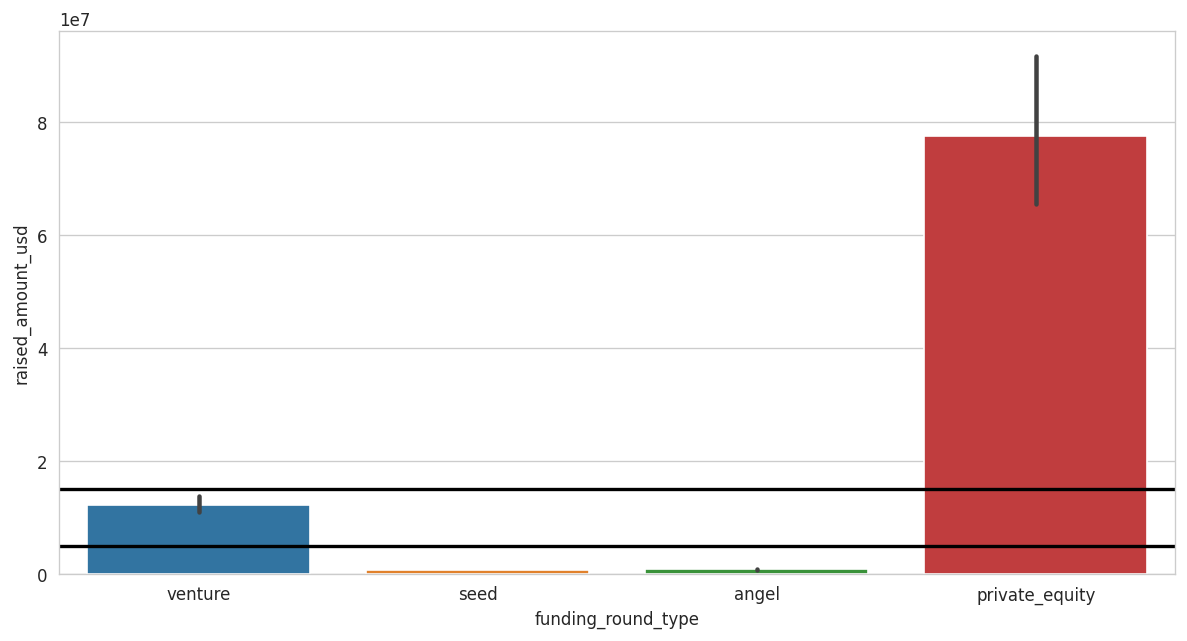

In [302]:
# Plot bar chart with default statistic as mean
plt.figure(figsize=(12, 6),dpi=120,frameon=True)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=main_frame)
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

In [303]:
#The raised amount in USD round it for more clearity
round(main_frame.groupby('funding_round_type').raised_amount_usd.mean(), 4)

funding_round_type
angel             8.701500e+05
private_equity    7.750105e+07
seed              7.286085e+05
venture           1.220969e+07
Name: raised_amount_usd, dtype: float64

In [304]:
#convert this amount into million and then check the same
round(main_frame.groupby('funding_round_type').raised_amount_usd.mean()/1000000, 4)

funding_round_type
angel              0.8702
private_equity    77.5011
seed               0.7286
venture           12.2097
Name: raised_amount_usd, dtype: float64

# Checkpoint 3: Country Analysis 

In [305]:
#Since spark Funds wants to invest only between 5 to 15 million USD per investment round, drop other investment type
main_frame = main_frame[main_frame['funding_round_type'] == 'venture'] 

In [306]:
main_frame.head(2)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND
3,/organization/0-6-com,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,0-6.com,Curated Web,operating,CHN


In [307]:
# get top 9 countries
top9 = main_frame.groupby("country_code")['raised_amount_usd'].sum().sort_values(ascending = False)

In [308]:
# get top 9 countries
top9 = main_frame.groupby("country_code")['raised_amount_usd'].sum().sort_values(ascending = False).reset_index().head(9)

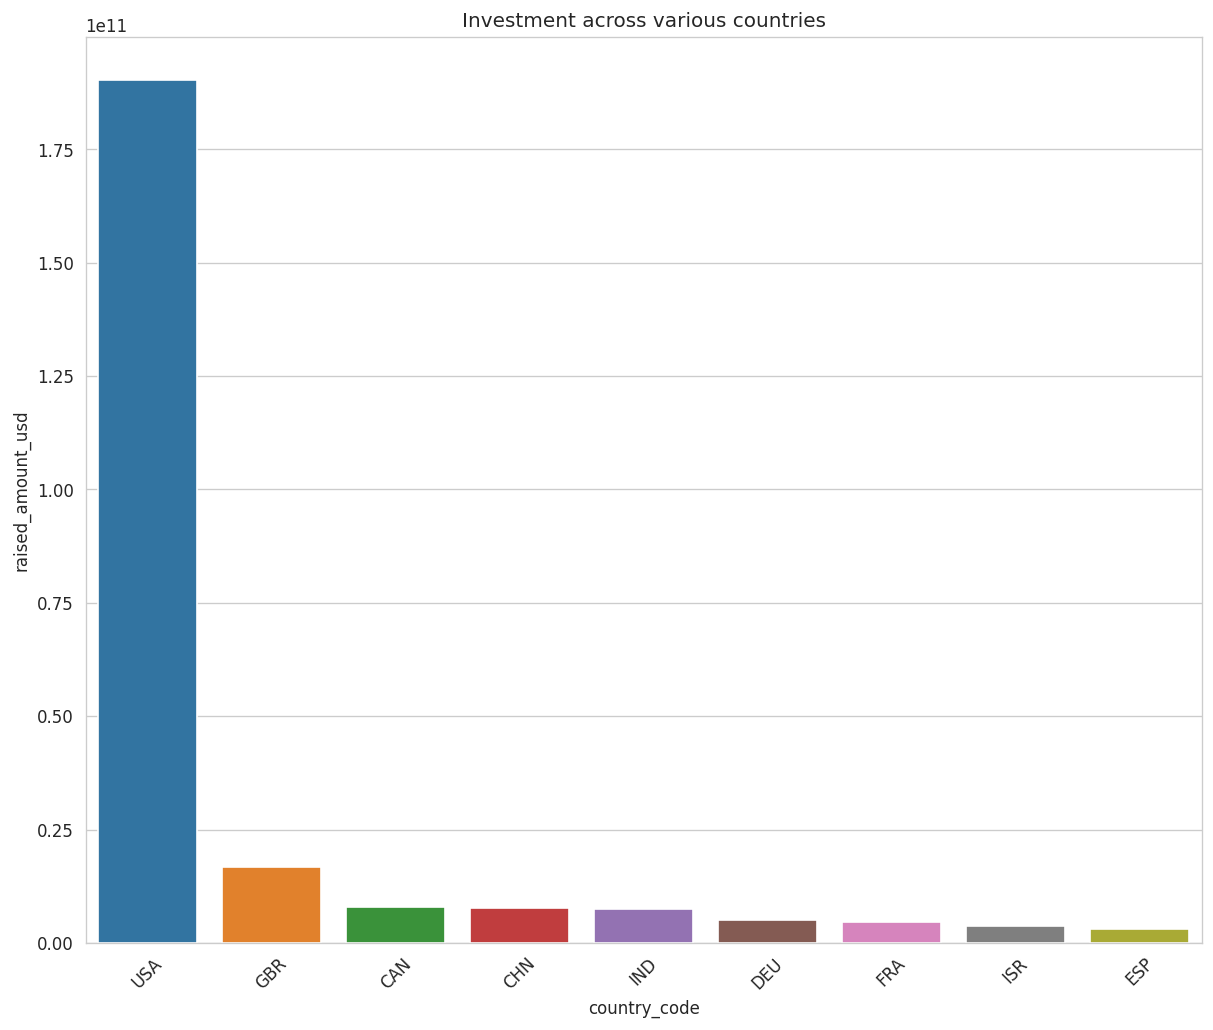

In [309]:
plt.figure(figsize = (12,10),dpi=120,frameon=True)
plt.title('Investment across various countries')
sns.barplot(x='country_code', y="raised_amount_usd", data=top9, estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

# Checkpoint 4: Sector Analysis 1


In [310]:
# SparksFunds wants to invest in only top three English speaking countries, we will retain only USA, GBR AND IND
main_frame = main_frame[(main_frame['country_code'] == 'USA')
                            | (main_frame['country_code'] == 'GBR')
                            | (main_frame['country_code'] == 'IND')]

In [311]:
main_frame.shape

(17132, 8)

In [312]:
#observe values in category list
main_frame['category_list'].value_counts()

Biotechnology                                                                                                        1239
Software                                                                                                             1229
Clean Technology                                                                                                      332
Health Care                                                                                                           319
Mobile                                                                                                                282
                                                                                                                     ... 
Craft Beer|E-Commerce|Marketplaces|Wine And Spirits                                                                     1
Brand Marketing|Business Development|Corporate Wellness                                                                 1
Law Enforcement|Legal|So

In [313]:
    # as per management we can consider the first category which has | as primary category
    main_frame['primary_sector'] = main_frame['category_list'].apply(lambda x:x.split("|")[0])

In [314]:
main_frame.primary_sector.unique()

array(['Media', 'Software', 'Mobile', 'Entertainment', 'Networking',
       'Health and Wellness', 'Beauty', 'Batteries', 'Biotechnology',
       'Sports', 'Fashion', 'Internet', 'Health Care', 'Fitness',
       'Manufacturing', 'E-Commerce', 'News', 'Art',
       'Hardware + Software', 'Clean Technology', 'Ad Targeting',
       'Landscaping', 'Messaging', 'Interior Design', 'Energy', 'Apps',
       'FinTech', 'Consumer Electronics', 'Data Centers',
       'Project Management', 'Babies', '3D', '3D Technology',
       'Automotive', 'Finance', 'Automated Kiosk', 'Music', 'Web Hosting',
       'Developer APIs', 'Flash Storage', 'Creative Industries',
       'Machine Learning', 'Crowdfunding', 'Commercial Real Estate',
       'Web Design', 'Analytics', 'Games', 'Advertising', 'Office Space',
       'Real Estate', 'Information Technology', 'Accounting',
       'Browser Extensions', 'Technology', 'Social Media',
       'Brand Marketing', 'Home Decor', 'Curated Web', 'Crowdsourcing',
       '

In [315]:
#read Mapping file
mapping = pd.read_csv('mapping.csv')

In [316]:
# no error in reading, look at the data
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [317]:
#since above data is in long format , we have to convert it.
value_vars = list(mapping.columns[1:])

id_vars = list(np.setdiff1d(mapping.columns, value_vars))

print(value_vars, "\n")
print(id_vars)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [318]:
# using melt function to convert long data into our desired format
mapping_df = pd.melt(mapping, id_vars = id_vars,value_vars = value_vars)

In [319]:
# remove rows having value=0
mapping_df = mapping_df[mapping_df['value']==1]
mapping_df = mapping_df.drop('value', axis=1)

In [320]:
mapping_df.head()

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [321]:
#change the name of the column
mapping_df = mapping_df.rename(columns={'variable': 'main_sector'})

In [322]:
mapping_df.tail()

,category_list,main_sector
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"
6167,Venture Capital,"Social, Finance, Analytics, Advertising"


In [323]:
#merge mapping data to master frame
main_frame = main_frame.merge(mapping_df, how = 'left', left_on ='primary_sector',
                                  right_on="category_list")
main_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media,Media,Entertainment
1,/organization/004-technologies,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,004 Technologies,Software,operating,USA,Software,Software,Others
2,/organization/1,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.0,One Inc.,Mobile,operating,USA,Mobile,Mobile,"News, Search and Messaging"
3,/organization/1-4-all,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,1-4 All,Entertainment|Games|Software,operating,USA,Entertainment,Entertainment,Entertainment
4,/organization/1-618-technology,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0,1.618 Technology,Networking|Real Estate|Web Hosting,operating,USA,Networking,Networking,Others


In [324]:
main_frame.main_sector.value_counts()

Others                                     4154
Social, Finance, Analytics, Advertising    2845
Cleantech / Semiconductors                 2321
News, Search and Messaging                 2229
Health                                     1445
Entertainment                              1278
Manufacturing                              1191
Automotive & Sports                         422
Name: main_sector, dtype: int64

# Checkpoint 5: Sector Analysis 2

In [325]:
D1 = main_frame[(main_frame['country_code'] == 'USA') & 
             (main_frame['raised_amount_usd'] >= 5000000) & 
             (main_frame['raised_amount_usd'] <= 15000000)]

In [326]:
D1.head()


,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
5,/organization/1-800-dentist,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,1-800-DENTIST,Health and Wellness,operating,USA,Health and Wellness,Health and Wellness,Health
10,/organization/120-sports,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,8900000.0,120 Sports,Sports,operating,USA,Sports,Sports,Automotive & Sports
16,/organization/1eq,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,11999347.0,Babyscripts,Health and Wellness|Mobile Health,operating,USA,Health and Wellness,Health and Wellness,Health
24,/organization/22nd-century-group,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,5000000.0,22nd Century Group,Biotechnology,ipo,USA,Biotechnology,Biotechnology,Cleantech / Semiconductors
26,/organization/24-hour-pro-muscle-gym,/funding-round/61660637eae067a2980ecbc3633ad262,venture,6230000.0,24 Hour Pro Muscle Gym,Sports,operating,USA,Sports,Sports,Automotive & Sports


In [327]:
# group by main sector and get sum and count of raised_amount_usd
D1_agg = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
#drop level so that it can be merged with main data
D1_agg = D1_agg.droplevel(axis=1, level=[0]).reset_index()


In [328]:
D1 = D1.merge(D1_agg, how='left', on ='main_sector')

In [329]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,Total_amount,Total_count
0,/organization/1-800-dentist,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,1-800-DENTIST,Health and Wellness,operating,USA,Health and Wellness,Health and Wellness,Health,3.901817e+09,436.0
1,/organization/120-sports,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,8900000.0,120 Sports,Sports,operating,USA,Sports,Sports,Automotive & Sports,9.549889e+08,108.0
2,/organization/1eq,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,11999347.0,Babyscripts,Health and Wellness|Mobile Health,operating,USA,Health and Wellness,Health and Wellness,Health,3.901817e+09,436.0
3,/organization/22nd-century-group,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,5000000.0,22nd Century Group,Biotechnology,ipo,USA,Biotechnology,Biotechnology,Cleantech / Semiconductors,6.500448e+09,724.0
4,/organization/24-hour-pro-muscle-gym,/funding-round/61660637eae067a2980ecbc3633ad262,venture,6230000.0,24 Hour Pro Muscle Gym,Sports,operating,USA,Sports,Sports,Automotive & Sports,9.549889e+08,108.0


In [330]:
D2 = main_frame[(main_frame['country_code'] == 'GBR') & 
             (main_frame['raised_amount_usd'] >= 5000000) & 
             (main_frame['raised_amount_usd'] <= 15000000)]

In [331]:
# group by main sector and get sum and count of raised_amount_usd
D2_agg = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
#drop level so that it can be merged with main data
D2_agg = D2_agg.droplevel(axis=1, level=[0]).reset_index()


In [332]:
D2 = D2.merge(D2_agg, how='left', on ='main_sector')

In [333]:
D2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,Total_amount,Total_count
0,/organization/1rebel,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,5000000.0,1Rebel,Fitness,operating,GBR,Fitness,Fitness,Health,229049429.0,26.0
1,/organization/40-partners-ltd,/funding-round/54874a891ac80a0a6b87e6a8eaf79fe8,venture,10000000.0,40 Partners Ltd,Creative Industries|Entertainment|Television,operating,GBR,Creative Industries,Creative Industries,Entertainment,455270303.0,51.0


In [334]:
D3 = main_frame[(main_frame['country_code'] == 'IND') & 
             (main_frame['raised_amount_usd'] >= 5000000) & 
             (main_frame['raised_amount_usd'] <= 15000000)]

In [335]:
# group by main sector and get sum and count of raised_amount_usd
D3_agg = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
#drop level so that it can be merged with main data
D3_agg = D3_agg.droplevel(axis=1, level=[0]).reset_index()


In [336]:
D3 = D3.merge(D3_agg, how='left', on ='main_sector')

In [337]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,Total_amount,Total_count
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media,Media,Entertainment,229804824.0,25.0
1,/organization/1000lookz,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,1000Lookz,Beauty,operating,IND,Beauty,Beauty,Health,78705000.0,12.0
2,/organization/99games-online-private-limited,/funding-round/7c1b312fd45a3ac21a44a9c8b2f6fb0f,venture,13660000.0,99Games Online Private Limited,Games,operating,IND,Games,Games,Entertainment,229804824.0,25.0
3,/organization/a-little-world,/funding-round/3b3bc42a55a1429e783e6df058dc3676,venture,6999995.0,A LITTLE WORLD,Finance,operating,IND,Finance,NaN,NaN,NaN,NaN
4,/organization/adstringo,/funding-round/79984eff3785db8683fb7a73fc4e8923,venture,10000000.0,AdStringO,Software,operating,IND,Software,Software,Others,571442653.0,63.0


In [338]:
#Count number of investments
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

4902
457
191


In [339]:
#Pint Sum of raised_amount in USD
print(round(D1.raised_amount_usd.sum()))
print(round(D2.raised_amount_usd.sum()))
print(round(D3.raised_amount_usd.sum()))

43531171771
4020268135
1689720461


In [340]:
#Sort by Total_count
D1_agg.sort_values("Total_count",ascending=False)

,main_sector,Total_amount,Total_count
6,Others,1.048803e+10,1193
7,"Social, Finance, Analytics, Advertising",7.007453e+09,795
1,Cleantech / Semiconductors,6.500448e+09,724
5,"News, Search and Messaging",5.487191e+09,607
3,Health,3.901817e+09,436
4,Manufacturing,3.058107e+09,348
2,Entertainment,3.017680e+09,339
0,Automotive & Sports,9.549889e+08,108


In [352]:
#Sort by Total_count
D2_agg.sort_values("Total_count",ascending=False)

,main_sector,Total_amount,Total_count
6,Others,893048701.0,106
7,"Social, Finance, Analytics, Advertising",696920238.0,81
5,"News, Search and Messaging",614093384.0,69
1,Cleantech / Semiconductors,529886522.0,57
2,Entertainment,455270303.0,51
4,Manufacturing,299445583.0,32
3,Health,229049429.0,26
0,Automotive & Sports,32800000.0,4


In [342]:
#Sort by Total_count
D3_agg.sort_values("Total_count",ascending=False)

,main_sector,Total_amount,Total_count
6,Others,571442653.0,63
2,Entertainment,229804824.0,25
5,"News, Search and Messaging",239812475.0,25
7,"Social, Finance, Analytics, Advertising",191036232.0,22
4,Manufacturing,141904960.0,15
3,Health,78705000.0,12
1,Cleantech / Semiconductors,89855661.0,11
0,Automotive & Sports,30999997.0,4


In [354]:
#Group By using company_permalink
D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/centrillion-biosciences    15000000.0
/organization/pnp-therapeutics           15000000.0
/organization/greyson-international      15000000.0
/organization/hubble-telemedical         15000000.0
/organization/humacyte                   15000000.0
Name: raised_amount_usd, dtype: float64

In [355]:
#Group By using company_permalink
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/zperfectgift                     15000000.0
/organization/liquidspace                      15000000.0
/organization/centro                           15000000.0
/organization/velatel-global-communications    15000000.0
/organization/quandora                         15000000.0
Name: raised_amount_usd, dtype: float64

In [356]:
#Group By using company_permalink
D2[D2['main_sector']=='Cleantech / Semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/uwi-technology       15000000.0
/organization/biomoti              15000000.0
/organization/lime-microsystems    15000000.0
/organization/i2o-water            15000000.0
/organization/eosemi               15000000.0
Name: raised_amount_usd, dtype: float64

In [346]:
#Group By using company_permalink
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/wsi-onlinebiz    15000000.0
/organization/i-nexus          15000000.0
/organization/puzl             15000000.0
/organization/bitposter        15000000.0
/organization/sparkle-cs       15000000.0
Name: raised_amount_usd, dtype: float64

In [357]:
#Group By using company_permalink
D3[D3['main_sector']=='News, Search and Messaging'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/propstack        14000000.0
/organization/awaaz-de         14000000.0
/organization/exotel           14000000.0
/organization/grab-2           13012475.0
/organization/karmyog-media    13000000.0
Name: raised_amount_usd, dtype: float64

In [348]:
#Group By using company_permalink
D3[D3['main_sector'].isin(['Entertainment','Social, Finance, Analytics, Advertising'])].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/nunook-interactive                             15000000.0
/organization/greymeter                                      15000000.0
/organization/hungama-digital-media-entertainment-pvt-ltd    15000000.0
/organization/mobme-wireless-solutions                       15000000.0
/organization/99games-online-private-limited                 13660000.0
Name: raised_amount_usd, dtype: float64

In [349]:
#Sort the dataframes
D1_agg1 = D1_agg.sort_values("Total_count",ascending=False).head(4).reset_index()
D1_agg1["country"] = "USA";
D2_agg1 = D2_agg.sort_values("Total_count",ascending=False).head(4).reset_index()
D2_agg1["country"] = "GBR";
D3_agg1 = D3_agg.sort_values("Total_count",ascending=False).head(5).reset_index()
D3_agg1["country"] = "IND";

In [350]:
#Mearge the dataframes
D4=pd.merge(pd.merge(D1_agg1,D2_agg1,how='outer'),D3_agg1,how='outer')
D4

,index,main_sector,Total_amount,Total_count,country
0,6,Others,1.048803e+10,1193,USA
1,7,"Social, Finance, Analytics, Advertising",7.007453e+09,795,USA
2,1,Cleantech / Semiconductors,6.500448e+09,724,USA
3,5,"News, Search and Messaging",5.487191e+09,607,USA
4,6,Others,8.930487e+08,106,GBR
5,7,"Social, Finance, Analytics, Advertising",6.969202e+08,81,GBR
6,5,"News, Search and Messaging",6.140934e+08,69,GBR
7,1,Cleantech / Semiconductors,5.298865e+08,57,GBR
8,6,Others,5.714427e+08,63,IND
9,2,Entertainment,2.298048e+08,25,IND


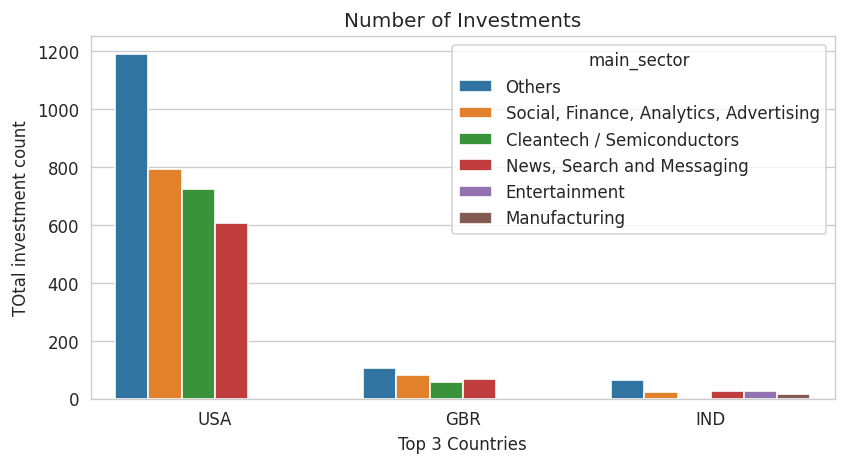

In [358]:
#Plot the dataframe data on barchart
plt.figure(figsize=[8.0,4.0],dpi=120,frameon=True)
sns.barplot(x='country', y='Total_count', hue='main_sector',data=D4)
plt.ylabel("TOtal investment count")
plt.xlabel("Top 3 Countries")
plt.title("Number of Investments") 
plt.show()